In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:>

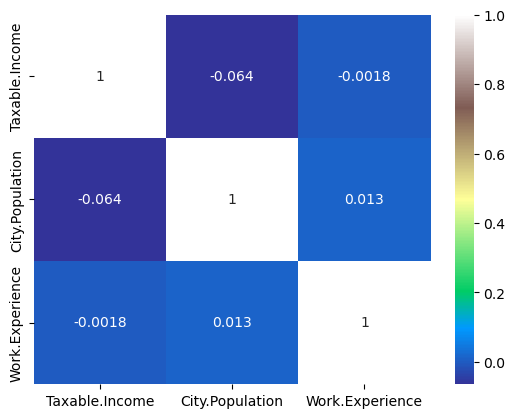

In [5]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='terrain')

In [6]:
df.insert(6, 'tax_class'," ")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,
1,YES,Divorced,33700,134075,18,YES,
2,NO,Married,36925,160205,30,YES,
3,YES,Single,50190,193264,15,YES,
4,NO,Married,81002,27533,28,NO,
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,
596,YES,Divorced,69967,55369,2,YES,
597,NO,Divorced,47334,154058,0,YES,
598,YES,Married,98592,180083,17,NO,


In [7]:
for i in range(0,len(df['Taxable.Income']), 1):
    if df['Taxable.Income'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'

C:\Users\Dell\AppData\Local\Temp\ipykernel_16644\1149535660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Good'
C:\Users\Dell\AppData\Local\Temp\ipykernel_16644\1149535660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Risky'


In [8]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
# df['tax_class'] = pd.cut(df['Taxable.Income'], bins=[0,30000,1000000], labels=['Risky','Good'])
# df['tax_class'] = df.mask(df['Taxable.Income']>30000, 1)
# df['tax_class'] = df.mask(df['Taxable.Income']<=30000, 0)
#df1['tax_class'] = np.where(df1['tax_class']<=30000, 0,df1['tax_class'])
#df1['tax_class'] = np.where(df1['tax_class']>30000, 1,df1['tax_class'])

In [10]:
df2 = df.drop(['Taxable.Income'], axis=1)
df2

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [11]:
df2 = df2.rename({'Marital.Status':'mar_stat','City.Population':'city_pop','Work.Experience':'work.exp'}, axis=1)
df2

,Undergrad,mar_stat,city_pop,work.exp,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [12]:
df3 = pd.get_dummies(df2, columns=['mar_stat','Undergrad','Urban'], drop_first=True)
df3

,city_pop,work.exp,tax_class,mar_stat_Married,mar_stat_Single,Undergrad_YES,Urban_YES
0,50047,10,Good,0,1,0,1
1,134075,18,Good,0,0,1,1
2,160205,30,Good,1,0,0,1
3,193264,15,Good,0,1,1,1
4,27533,28,Good,1,0,0,0
...,...,...,...,...,...,...,...
595,39492,7,Good,0,0,1,1
596,55369,2,Good,0,0,1,1
597,154058,0,Good,0,0,0,1
598,180083,17,Good,1,0,1,0


In [13]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df3.tax_class = lc.fit_transform(df3.tax_class)

In [14]:
df3

,city_pop,work.exp,tax_class,mar_stat_Married,mar_stat_Single,Undergrad_YES,Urban_YES
0,50047,10,0,0,1,0,1
1,134075,18,0,0,0,1,1
2,160205,30,0,1,0,0,1
3,193264,15,0,0,1,1,1
4,27533,28,0,1,0,0,0
...,...,...,...,...,...,...,...
595,39492,7,0,0,0,1,1
596,55369,2,0,0,0,1,1
597,154058,0,0,0,0,0,1
598,180083,17,0,1,0,1,0


In [15]:
#Creating Model 
a1 = df3.drop(['tax_class'], axis=1)
a1

,city_pop,work.exp,mar_stat_Married,mar_stat_Single,Undergrad_YES,Urban_YES
0,50047,10,0,1,0,1
1,134075,18,0,0,1,1
2,160205,30,1,0,0,1
3,193264,15,0,1,1,1
4,27533,28,1,0,0,0
...,...,...,...,...,...,...
595,39492,7,0,0,1,1
596,55369,2,0,0,1,1
597,154058,0,0,0,0,1
598,180083,17,1,0,1,0


In [16]:
a2 = df3.tax_class
a2

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_class, Length: 600, dtype: int32

In [17]:
x = a1.values
y = a2.values

In [18]:
x

array([[ 50047,     10,      0,      1,      0,      1],
       [134075,     18,      0,      0,      1,      1],
       [160205,     30,      1,      0,      0,      1],
       ...,
       [154058,      0,      0,      0,      0,      1],
       [180083,     17,      1,      0,      1,      0],
       [158137,     16,      0,      0,      0,      0]], dtype=int64)

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=7, random_state= None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7401016220441664


In [21]:
num_trees = 120
max_features = 3
kfold = KFold(n_splits=7, random_state= None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7400820793433652


In [22]:
num_trees = 140
max_features = 3
kfold = KFold(n_splits=7, random_state= None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7418018370138754


In [23]:
num_trees = 160
max_features = 3
kfold = KFold(n_splits=7, random_state= None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7484463552863005


In [24]:
num_trees = 200
max_features = 3
kfold = KFold(n_splits=7, random_state= None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7451240961500879
